Deep learning neural networks are very easy to create and evaluate in Python with Keras, but we must follow a strict model life-cycle. In this kernel we will discover the step-by-step life-cycle for creating, training and evaluating deep learning neural networks in Keras and how to make predictions with a trained model.

## <u>Keras Model Life-Cycle </u>
1. Define Network
2. Compile Network
3. Fit Network
4. Evaluate Network
5. Make Predictions

### <u> Step 1. Define Network </u>
Neural networks are defined in Keras as a sequence of layers. The container for these layers is the Sequential class. The first step is to create an instance of the Sequential class. Then we can create our layers and add them in the order that they should be connected.

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [2]:
# Sequential model with one Dense layer with 2 neurons.

# Create the layers and add them in the order that they should be connected.
model = Sequential()
model.add(Dense(2))

# OR

# Create an array of layers and pass it to the constructor of the Sequential class.

layers = [Dense(2)]
model = Sequential(layers)

The first layer in the network must define the number of inputs to expect. For a Multilayer Perceptron model this is specified by "input_dim" attribute.

In [3]:
# MLP with 2 inputs in the visible layer, 5 neurons in the hidden layer and one neuron in the output layer.
# Activation functions are defined separately from layers.

model = Sequential()
model.add(Dense(5, input_dim=2))
model.add(Activation('relu'))
model.add(Dense(1))  # 全连接层
model.add(Activation('sigmoid'))

The choice of activation function is most important for the output layer as it will define the format that predictions will take.

- <b> Regression </b>: Linear activation function, or linear, and the number of neurons matching the number of outputs.
- <b> Binary Classification (2 class) </b>: Logistic activation function, or sigmoid, one neuron at the output layer.
- <b> Multiclass Classification (>2 class) </b>: Softmax activation function, or softmax, and one output neuron per class value, assuming one hot encoded output pattern.

### <u> Step 2. Compile Network </u>

Compilation requires the specification of the optimization algorithm to use to train the network and the loss function used to evaluate the network that is minimized by the optimization algorithm.

In [4]:
from keras import optimizers

model.compile(optimizer='sgd', loss='mean_squared_error')

# OR

algorithm = optimizers.SGD(lr=0.1, momentum=0.3)
model.compile(optimizer=algorithm, loss='mean_squared_error')

Standard loss functions for different predictive model types:
- <b> Regression </b>: Mean Squared Error.
- <b> Binary Classification (2 class) </b>: Logarithmic Loss, also called cross entropy or binary crossentropy.
- <b> Multiclass Classification (>2 class) </b>: Multiclass Logarithmic Loss or categorical crossentropy.

Commonly used optimization algorithms:
- <b> Stochastic Gradient Descent </b> - Requires the tuning of a learning rate and momentum.
- <b> Adam </b> - Requires the tuning of learning rate.
- <b> RMSprop </b> - Requires the tuning of learning rate.

Finally, we can also specify metrics to while fitting our model in addition to the loss function. Generally, the most useful additional metric to collect is "accuracy" for classification problems.

In [5]:
# Defining metrics when compiling the model.

model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

### <u> Step 3. Fit Network </u>

Once the network is compiled, it can be fit to adapt the weights on a training dataset. Fitting the network requires Matrix "train_X", and array "train_y". The network is trained using the backpropagation algorithm and optimized according to the optimization algorithm and loss function specified when compiling the model.

The backpropagation algorithm requires that the network be trained for a specified number of epochs. Each epoch can be partitioned into groups of input-output pattern pairs called batches.Weights are updated after each epoch.

In [6]:
# history = model.fit(X, y, batch_size=10, epochs=100)

Once fit, a history object is returned that provides a summary of the performance of the model during training. This includes both the loss and any additional metrics specified when compiling the model, recorded each epoch.

### <u>Step 4. Evaluate Network </u>

Once the network is trained, it can be evaluated. We evaluate the performance of the network on a separate dataset, unseen during training.

The model evaluates the loss across all of the test patterns, as well as any other metrics specified when the model was compiled, like classification accuracy. A list of evaluation metrics is returned. For example, for a model compiled with the accuracy metric, we could evaluate it on a new dataset as follows:

In [7]:
# loss, accuracy = model.evaluate(test_X, test_y)

### <u>Step 5. Make Predictions </u>

Once we are satisfied with the performance of our fit model, we can use it to make predictions on new data.

In [8]:
# predictions = model.predict(test_X)

The predictions will be returned in the format provided by the output layer of the network. In the case of a regression problem, these predictions may be in the format of the problem directly, provided by a linear activation function. For a binary classification problem, the predictions may be an array of probabilities for the first class that can be converted to a 1 or 0 by rounding.

For a multiclass classification problem, the results may be in the form of an array of probabilities (assuming a one hot encoded output variable) that may need to be converted to a single class output prediction using the argmax() NumPy function. Alternately, for classification problems, we can use the predict classes() function that will automatically convert uncrisp predictions to crisp integer class values.

In [9]:
# predictions = model.predict_classes(test_X)

## <u> Keras Functional Models </u>

The sequential API allows us to create models layer-by-layer for most problems. It is limited in that it does not allow us to create models that share layers or have multiple inputs or outputs. The functional API in Keras is an alternate way of creating models that offers a lot more flexibility, including creating more complex models.

It specifically allows us to define multiple input or output models as well as models that share layers. It also allows us to define ad hoc acyclic network graphs.

### <u> Defining Input </u>


Unlike the Sequential model, we must create and define a standalone Input layer that specifies the shape of input data. The input layer takes a shape argument(tuple) that indicates the dimensionality of the input data. When input data is one-dimensional,(for a Multilayer Perceptron) the shape must explicitly leave room for the shape of the mini-batch size used when splitting the data when training the network. Therefore, the shape tuple is always defined with a hanging last dimension (2,).

In [10]:
from keras.layers import Input

visible = Input(shape=(2,))

### <u>Connecting Layers </u>
The layers in the model are connected pairwise. This is done by specifying where the input comes from when defining each new layer.


In [11]:
# Create the input layer, then create a hidden layer as a Dense that receives input only from the input layer.
# (visible) after the creation of the Dense layer connects the input layer’s output as the input to the Dense hidden layer.

from keras.layers import Input
from keras.layers import Dense

visible = Input(shape=(2,))
hidden = Dense(2)(visible)

### <u> Creating the Model </u>

After creating the model layers and connecting them together, we must define the model. As with the Sequential API, the model is the thing we can summarize, fit, evaluate, and use to make predictions. Keras provides a Model class that we can use to create a model from our created layers. It requires that we only specify the input and output layers.

In [12]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense

visible = Input(shape=(2,))
hidden = Dense(2)(visible)
model = Model(inputs=visible, outputs=hidden)

## <u> Standard Network Models </u>

### <u> Multilayer Perceptron </u>

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 10)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________


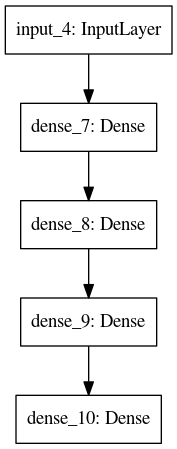

In [13]:
# Multilayer Perceptron

from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense

# 10 inputs
visible = Input(shape=(10,))

# 3 hidden layers with 10, 20, and 10 neurons
hidden1 = Dense(10, activation='relu')(visible)
hidden2 = Dense(20, activation='relu')(hidden1)
hidden3 = Dense(10, activation='relu')(hidden2)

# Output layer with 1 output
output = Dense(1, activation='sigmoid')(hidden3)

model = Model(inputs=visible, outputs=output)

# summarize layers
model.summary()

# plot graph
plot_model(model, to_file='multilayer_perceptron_graph.png')

### <u> Convolutional Neural Network </u>

Convolutional neural network for image classification. The model receives black and white 64 x 64 images as input, then has a sequence of two convolutional and pooling layers as feature extractors, followed by a fully connected layer to interpret the features and an output layer with a sigmoid activation for two-class predictions.

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 16)        8208      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
dense_11 (Dense)             (None, 13, 13, 10)        170       
_________________________________________________________________
dense_12 (Dense)             (None, 13, 13, 1)         11  

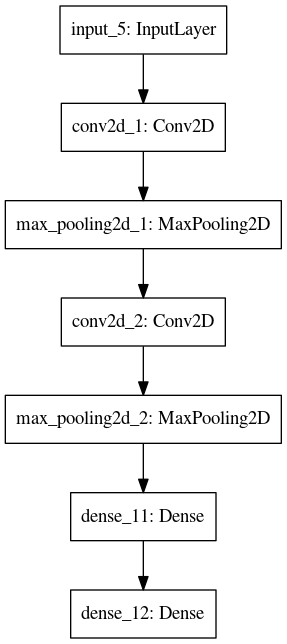

In [14]:
# Convolutional Neural Network
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

# Model receives black and white 64 x 64 images as input
visible = Input(shape=(64,64,1))

# Sequence of two convolutional and pooling layers as feature extractors
conv1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(16, kernel_size=4, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

# Fully connected layer to interpret the features
hidden1 = Dense(10, activation='relu')(pool2)

# Output layer with a sigmoid activation for two-class predictions
output = Dense(1, activation='sigmoid')(hidden1)

model = Model(inputs=visible, outputs=output)

# summarize layers
model.summary()

# plot graph
plot_model(model, to_file='convolutional_neural_network.png')

### <u> Recurrent Neural Network </u>

Long short-term memory recurrent neural network for sequence classification.

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 100, 1)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


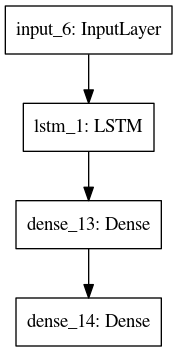

In [15]:
# Recurrent Neural Network
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.recurrent import LSTM

# 100 time steps of one feature as input
visible = Input(shape=(100,1))

# Single LSTM hidden layer to extract features from the sequence
hidden1 = LSTM(10)(visible)

# Fully connected layer to interpret the LSTM output
hidden2 = Dense(10, activation='relu')(hidden1)

# Output layer for making binary predictions
output = Dense(1, activation='sigmoid')(hidden2)

model = Model(inputs=visible, outputs=output)

# summarize layers
model.summary()

# plot graph
plot_model(model, to_file='recurrent_neural_network.png')


### End
If you reached this far please comment and upvote this kernel, feel free to make improvements on the kernel and please share if you found anything useful !